In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
# import some data to play with
fraud = pd.read_csv('/content/Fraud_check.csv')

In [3]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
df=fraud.rename(columns={'Marital.Status':'Marital','Taxable.Income':'Tax','City.Population':'population','Work.Experience':'experience'}, inplace = False)

In [5]:
df

,Undergrad,Marital,Tax,population,experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [6]:
df['risk'] = df.Tax.map(lambda x: 1 if x>=30000 else 0)

In [7]:
df['Undergrad']=df['Undergrad'].astype('category')
df['Marital']=df['Marital'].astype('category')
df['Urban']=df['Urban'].astype('category')

In [8]:
df['Undergrad']=df['Undergrad'].cat.codes
df['Marital']=df['Marital'].cat.codes
df['Urban']=df['Urban'].cat.codes
df.tail()

,Undergrad,Marital,Tax,population,experience,Urban,risk
595,1,0,76340,39492,7,1,1
596,1,0,69967,55369,2,1,1
597,0,0,47334,154058,0,1,1
598,1,1,98592,180083,17,0,1
599,0,0,96519,158137,16,0,1


In [9]:
df1=df.drop(['Tax'], axis = 1)

In [10]:
df1

,Undergrad,Marital,population,experience,Urban,risk
0,0,2,50047,10,1,1
1,1,0,134075,18,1,1
2,0,1,160205,30,1,1
3,1,2,193264,15,1,1
4,0,1,27533,28,0,1
...,...,...,...,...,...,...
595,1,0,39492,7,1,1
596,1,0,55369,2,1,1
597,0,0,154058,0,1,1
598,1,1,180083,17,0,1


In [11]:
x=df1.iloc[:,0:4]
y=df1['risk']

In [12]:
# Splitting data into training and testing data set
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2,random_state=0)

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [14]:
clf=RandomForestClassifier(n_estimators=100)

In [15]:
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [16]:
y_pred=clf.predict(x_test)

In [17]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7083333333333334


Random forest with kfold

In [18]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier


In [19]:
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10, random_state=7)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.7266666666666667


RANDOM FOREST WITH GRIDSEARCH



In [20]:
from sklearn.model_selection import learning_curve, GridSearchCV

In [21]:
rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 

param_grid = { 
    'n_estimators': [200, 700,500,1000],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x, y)
print (CV_rfc.best_params_)

{'max_features': 'log2', 'n_estimators': 200}


In [22]:
rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=200, oob_score = True)

In [23]:
CV_rfc = GridSearchCV(rfc,param_grid,scoring='accuracy')
CV_rfc.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='sqrt',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=200, n_jobs=-1,
                                              oob_score=True, random_state=None,
                                

In [24]:
y_pred1=CV_rfc.predict(x_test)

In [25]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))

Accuracy: 0.725


In [27]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [28]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, 
                            max_depth=3,
                            max_features='auto', 
                            min_samples_leaf=4,
                            bootstrap=True, 
                            n_jobs=-1, 
                            random_state=0)
rf.fit(x, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

[Text(465.0, 475.65000000000003, 'experience <= 11.5\ngini = 0.312\nsamples = 381\nvalue = [116, 484]\nclass = 1'),
 Text(279.0, 339.75, 'population <= 193594.0\ngini = 0.374\nsamples = 130\nvalue = [49, 148]\nclass = 1'),
 Text(186.0, 203.85000000000002, 'experience <= 5.5\ngini = 0.355\nsamples = 126\nvalue = [44, 147]\nclass = 1'),
 Text(93.0, 67.94999999999999, 'gini = 0.269\nsamples = 55\nvalue = [13, 68]\nclass = 1'),
 Text(279.0, 67.94999999999999, 'gini = 0.405\nsamples = 71\nvalue = [31, 79]\nclass = 1'),
 Text(372.0, 203.85000000000002, 'gini = 0.278\nsamples = 4\nvalue = [5, 1]\nclass = 0'),
 Text(651.0, 339.75, 'population <= 192706.5\ngini = 0.277\nsamples = 251\nvalue = [67, 336]\nclass = 1'),
 Text(558.0, 203.85000000000002, 'Marital <= 1.5\ngini = 0.289\nsamples = 238\nvalue = [67, 315]\nclass = 1'),
 Text(465.0, 67.94999999999999, 'gini = 0.319\nsamples = 149\nvalue = [47, 189]\nclass = 1'),
 Text(651.0, 67.94999999999999, 'gini = 0.236\nsamples = 89\nvalue = [20, 126]

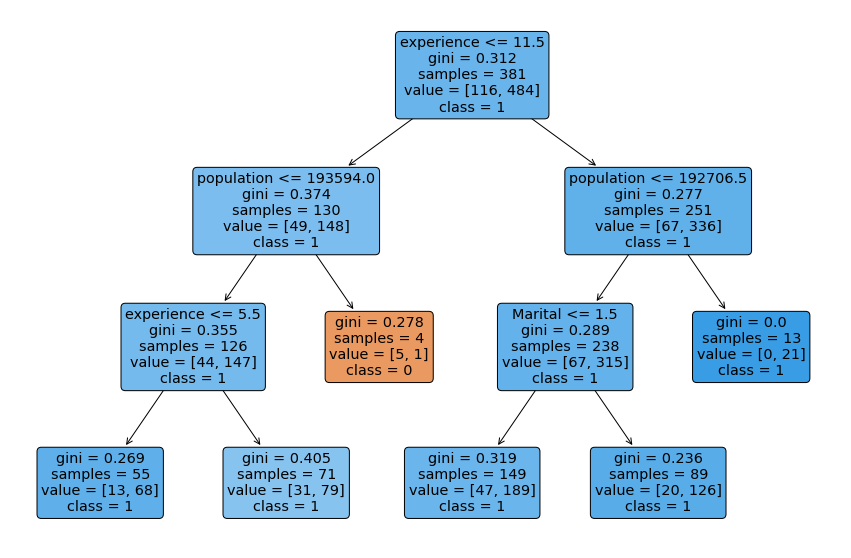

In [29]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
fn=['Undergrad','Marital','population','experience','Urban']
cn=['0','1']

fig = plt.figure(figsize=(15, 10))
plot_tree(rf.estimators_[0],
          feature_names = fn, 
               class_names=cn, 
       filled=True, impurity=True, 
          rounded=True)